<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    José D'Orazio De Abreu
</h3>
    
<h3 style="text-align:center">
    14/10/2024
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<font color="darkblue">
Este proyecto se centra en el análisis de un conjunto de datos de películas extraídos de IMDb, que incluye detalles como el título, año de estreno, director, más. Se han empleado técnicas de extracción, manipulación y procesamiento de datos en Python para extraer información relevante, identificar patrones y realizar visualizaciones sobre las películas.

<br>
El proposito de este proyecto es facilitar la familiarización con los conceptos y técnicas básicas de análisis de datos con Python. A lo largo del análisis, se busca responder:

<ul> 
	<li>¿Cuáles son las características de las películas más puntuadas? </li>
	<li> ¿Existen diferencias notables en el presupuesto de las películas según el país de origen?</li>
	<li>¿Qué directores tienen el mayor número de películas populares? </li>
</ul>

Al final, se presentarán observaciones basadas en los resultados obtenidos y en la aplicación de las técnicas de análisis.
</font>

<br>

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido solucionar todos los enunciados.

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de 9.8 sobre 10.
</font>

# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excel* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excel en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

In [1]:
# Librerías:

# Esta celda debe ser completada por el estudiante
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import statistics
import seaborn as sns

In [2]:
# Constantes globales:

# Esta celda debe ser completada por el estudiante
MOVIES_DATA = []
DESIRED_DATA = ["movie_title", "title_year", "director_name",
                "actor_1_name", "language", "country",
                "color", "budget", "imdb_score", "movie_imdb_link"]
FEW_FIELDS = "algunos_campos.txt"

# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [3]:
# Esta celda debe ser completada por el estudiante
with open("./data_in/movie_data.csv", 'r', encoding="UTF-8") as csvfile:
    MOVIES_DATA = list(csv.reader(csvfile))


def load_full_data(raw_data):
    """
    Carga el encabezado y los datos procesados de un archivo en formato CSV,
    separando la cabecera de las líneas de datos.

    Parameters:
    -----------
    raw_data: list
        Lista que contiene los datos en bruto (incluyendo la cabecera y
        la línea de datos).

    Precondition:
    -------------
    raw_data no está vacía y debe contener al menos una línea de datos.

    Returns:
    --------
    tuple: (list, list of lists)
        Una tupla que contiene dos elementos:
        - encabezado: lista con los nombres de las columnas extraídas de
          la primera línea de los datos en bruto.
        - datos: lista de listas, donde cada sublista representa una línea de datos.

    Raises:
    -------
    ValueError:
        Si la lista de datos está vacía o el encabezado no es una lista.
    """

    if not raw_data or len(raw_data) < 1:
        raise ValueError(
            "La lista de datos en bruto está vacía o no contiene datos válidos"
            )
    full_header = raw_data[0]
    full_list_data = raw_data[1:]
    if type(full_header) is not list:
        raise ValueError("El encabezado debe ser una lista")
    return full_header, full_list_data

In [4]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [5]:
# Esta celda debe ser completada por el estudiante

# enumera los encabezados para crear la lista de tuplas
# cada tupla contiene el índice y el valor correspondiente al encabezado
list_of_enumerated_headers = list(enumerate(full_header))

In [6]:
# Test de funcionamiento

print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


<font color="darkblue">
<h4> Resumen del apartado A.1. </h4>

En este apartado se realizaron los siguientes puntos:
<ol>
<li> Se logró cargar los datos de movies_data.csv en la constante global MOVIES_DATA, asegurando que la información este disponible para su uso en todo el proyecto.</li>
<li> Se realizo una verificación preliminar de los datos para asegurar que cumplen con las especificaciones mínimas</li>
<li> Los datos fueron divididos en dos componentes: el encabezado, que contiene los nombres de las columnas, y el conjunto de datos restante. Esto facilita el acceso y la manipulación especiífica de cada columna</li> 
<li> Se creo una lista de tuplas, en la que se enumeraron los posición de la columna del encabezado, permitiendo  un manejo más eficiente de los datos en procesos posteriores.</li>
</ol>

Este proceso asegura que los datos estén correctamente estructurados y verificados antes de iniciar con el análisis y procesamiento detallado de los siguientes apartados.

### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [7]:
# Esta celda debe ser completada por el estudiante
def main_data_from_item(data):
    """
    Filtra la data basándose en los campos dentro de DESIRED_DATA.

    Parameters:
    -----------
    data: list
        Lista bruta de datos que contienen múltiples registros.

    Precondition:
    -------------
    data no está vacía y contiene registros de tipo lista.

    Returns:
    --------
    list:
        Lista de datos filtrados que solo contienen los campos deseados,
        definidos en DESIRED_DATA.
    """

    index = [
        full_header.index(header)
        for header in DESIRED_DATA
        if header in full_header]
    if isinstance(data[0], list):
        return [[item[i] for i in index] for item in data]
    else:
        return [data[i] for i in index]

In [8]:
# Test de funcionamiento

print(main_data_from_item(full_header))

print()

datos_avatar_2009 = main_data_from_item(full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


<font color="darkblue">
<h4> Resumen del apartado A.2. </h4>

En este apartado se realizaron los siguientes puntos:
<ol>
<li> Se definió una variable que contiene las columnas deseadas Desired Data especificando los campos que se desean analizar en el conjunto de datos.</li>
<li> Se implemenntó una función main_data_from_item para la filtrar y obtener únicamente las columnas seleccionadas y sus respectivos valores.</li>
<li> Se verificó el funcionamiento de main_data_from_item mediante la impresión del encabezado resultante para confirmar que las columnas filtradas son las correctas. </li>
<li> El resultado de la fila cero (0) y la fila (4) han sido asignadas a dos variables para facilitar su uso en los análisis posteriores. </li>
</ol>
</font>

### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [9]:
# Esta celda debe ser completada por el estudiante
def datatypes_arranged(datos):
    """
    Arregla y limpia los datos en función de los tipos esperados de cada campo.

    Parameters:
    -----------
    datos: list
        Lista bruta de datos que contiene múltiples registros.
        Algunos campos pueden estar vacíos o contener fragmentos no deseados.

    Precondition:
    -------------
    La lista 'datos' debe contener al menos un registro con datos en formato texto
    o numérico.

    Returns:
    --------
    list:
        Una lista de datos en la que:
        - El título de la película se limpia de caracteres de escape como '\\'.
        - Los campos numéricos vacíos se reemplazan por -1.
        - El año y el presupuesto se convierten a enteros.
        - La valoración se convierte a un número de punto flotante.
        - La URL de la película se recorta para eliminar el fragmento final comenzado
          con "?ref".
    """

    new_data = []
    for i, value in enumerate(datos):
        if i == 0:
            value = value.strip().split('\\')[0]
        elif i == 1 or i == 7:
            value = int(value) if value else -1
        elif i == 8:
            value = float(value)
        elif i == 9:
            value = value.split("?ref")[0]
        new_data.append(value)
    return new_data

In [10]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))

['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


<font color="darkblue">
<h4> Resumen del apartado A.3. </h4>

En este apartado se realizaron las siguientes acciones:
<ol>
<li> Se implementó una función datatypes_arranged para formatear los valores de cada campo de datos según su tipo esperado: 
    <ul>
    <li> Las cadenas de textos se mantienen sin cambios</li>
    <li> Los números enteros (como el año y el presupuesto) se convierten a enteros, sustituyendo los campos vacíos por -1.</li>
    <li> Los números reales (como IMDb_Score) se convierten a float. </li>
    <li> Los URLs de las películas se recortan para eliminar fragmentos irrelevantes, asegurando que solo se conserve la parte principal de la dirección.</li>
    </ul>
</li>
<li> Se verificó el correcto funcionamiento de la función utilizando las variables obtenidas en la sección anterior, garantizando que los datos fueron limpiados y convertidos de manera adecuada.</li>
</ol>
</font>

### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [11]:
# Esta celda debe ser completada por el estudiante

colores = {color[0] for color in full_list_data}
pelis_victor = [
    (movie[11].split("\\")[0].strip(), int(movie[2]))
    for movie in full_list_data if "Victor" in movie[11]
    ]

In [12]:
# Test de funcionamiento

print(colores)
print(pelis_victor)

{'', 'Color', ' Black and White'}
[('Victor Frankenstein', 159), ('Victor Frankenstein', 159), ('The Young Victoria', 188), ('Victor Frankenstein', 159), ('Raising Victor Vargas', 59)]


<font color="darkblue">
<h4> Resumen del apartado A.4. </h4>

En este apartado se realizaron las siguientes acciones:
<ol>
<li> Se creó un conjunto que contiene todos los colores que aparecen en la data investigada, asegurando que no se repitan elementos. Esto permitió identificar los diferentes valores únicos y analizar su distribución.</li>
<li> Se investigó cuántas películas contienen la palabra "Victor" en su título o descripción. Además, se analizaron las calificaciones asociadas a estas películas para evaluar si existe alguna tendencia particular en las puntuaciones de IMDb para las películas que contienen dicho término.</li> 
</ol>

Este proceso facilita la identificación de patrones relacionados con el término "Victor" y su posible relación con las calificaciones de las películas.
</font>

# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [13]:
# Esta celda debe ser completada por el estudiante
def load_main_data(raw_data):
    """
    Extrae la data únicamente necesaria o solicitada.

    Parameters:
    -----------
    raw_data: list
        Lista bruta de datos que contiene los registros totales sin filtrar.
        Algunos campos pueden estar vacíos o contener fragmentos no deseados.

    Precondition:
    -------------
    raw_data no está vacía y contiene al menos una línea de datos.

    Returns:
    --------
    tuple:
        Una tupla que contiene dos elementos:
        - f_header: Lista de las columnas del encabezado.
        - main_dict: Diccionario que organiza el resto de la data, donde:
            - Key: Tupla que contiene el nombre de la película y el año.
            - Value: Lista que contiene el resto de elementos solicitados.
    """

    data = load_full_data(raw_data)
    f_header, f_data = map(main_data_from_item, data[:2])
    arranged_data = [datatypes_arranged(row) for row in f_data]
    main_dict = {(row[0], row[1]): row[2:] for row in arranged_data}
    return f_header, main_dict

In [14]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christopher Nolan', 'Tom Hardy', 'English', 'USA', 'Color', 250000000, 8.5, 'http://www.imdb.com/title/tt1345836/']
('Star Wars: Episode VII - The Force Awakens', -1)  ->  ['Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


Y ahora podemos suprimir la variable `full_list_data`

In [15]:
# Esta celda debe ser completada por el estudiante

# Se utiliza la instrucción `del` para eliminar la variable
del full_list_data

In [16]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


<font color="darkblue">
<h4> Resumen del apartado B.1. </h4>

En este apartado se realizaron las siguientes acciones:
<ol>
<li> Se implementó una función para cargar solo los datos que realmente se van a utilizar en el análisis, en lugar de cargar todo el archivo completo. </li>
<li> Los datos relevantes se almacenan en un diccionario donde las claves son una tupla (título, año) y los valores son listas con el resto de los campos relevantes de cada película.</li>
<li> Se adoptó el criterio de registrar solo la primera aparición de cada película con un título y año específico, eliminando las duplicaciones que podrían estar presentes en el archivo original. </li>
<li> Posteriormente, se eliminó la variable full_list_data, porque ya no era necesaria. </li>
</ol>

Esto permite cargar solo los datos relevantes para evitar una sobrecarga de la memoria y asegurar que el análisis posterior sea más rápido y específico. Solo se extraen las columnas necesarias del archivo.
</font>

### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [17]:
# Esta celda debe ser completada por el estudiante
def movies_anno_for_director(data, actor):
    """
    Extrae las fechas y películas en las cuales el actor participó.

    Parameters:
    -----------
    data : dict
        Diccionario de datos sobre películas, donde:
        - Key :tuple
            Una tupla que representa cada película, con:
                * Título de la película (str)
                * Año de producción (int)
        - Value : list de str
            Lista de nombres de actores que participaron en la película.

    actor : str
        Nombre del actor a buscar en las películas.

    Returns:
    --------
    list of tuples
        Lista de tuplas, donde cada tupla contiene:
        - str: Título de la película en la que participó el actor.
        - int: Año de producción de la película.
    """

    return [key for key, value in data.items() if actor in value]

In [18]:
# Test de funcionamiento

movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [19]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies(data):
    """
    Extrae el director con el mayor número de películas.

    Parameters:
    -----------
    data : dict
        Diccionario de datos donde:
        - Key : str
            Identificador único de cada película.
        - Value : list
            Lista de detalles de la película, donde:
                * Índice 0 (str): Nombre del director de la película.
                * Otros índices contienen información adicional que no se utiliza en esta función.

    Returns:
    --------
    tuple
        Una tupla con dos elementos:
        - max_key :str
            Nombre del director con el mayor número de películas.
        - max_movies : int
            Número total de películas dirigidas por dicho director.

    """

    max_movies = dict()
    for row in data.values():
        if row[0] and row[0] != -1:
            max_movies[row[0]] = max_movies.get(row[0], 0) + 1
    max_key = max(max_movies, key=max_movies.get)
    return max_key, max_movies[max(max_movies, key=max_movies.get)]

In [20]:
# Test de funcionamiento

print(directors_max_movies(main_dict_data))

('Steven Spielberg', 26)


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [21]:
# Esta celda debe ser completada por el estudiante
def years_num_movies(data, a, b):
    """
    Extrae los años y el número de películas en las cuales se actuó en un período dado.

    Parameters:
    -----------
    data : dict
        Diccionario de datos sobre películas, donde:
        - Key : tuple
        Una tupla que representa cada película, con:
                * Título de la película (str)
                * Año de lanzamiento (int)
        - Value : list
            Lista de actores (str) que participaron en la película.

    a : int
        Año de inicio del intervalo.
    b : int
        Año de finalización del intervalo.

    Returns:
    --------
    dict
        Diccionario donde:
        - Key : int
            Un año dentro del intervalo dado.
        - Value : int
            Número total de películas lanzadas en ese año dentro del intervalo.
    """

    new_dict = {}
    for key in data.keys():
        k1 = key[1]
        if k1 in range(a, b + 1):
            new_dict[k1] = new_dict.get(k1, 0) + 1
    return new_dict

In [22]:
# Test de funcionamiento

num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2009: 253, 2007: 198, 2015: 211, 2012: 214, 2010: 225, 2006: 235, 2008: 223, 2013: 231, 2011: 224, 2014: 243, 2005: 216, 2004: 207, 2003: 169, 2001: 183, 2002: 204, 2000: 169}


In [23]:
# Esta celda debe ser completada por el estudiante

num_movies_sorted = [
    (key, num_movies[key]) for key in sorted(num_movies.keys())
    ]

In [24]:
# Test de funcionamiento

print(num_movies_sorted)

[(2000, 169), (2001, 183), (2002, 204), (2003, 169), (2004, 207), (2005, 216), (2006, 235), (2007, 198), (2008, 223), (2009, 253), (2010, 225), (2011, 224), (2012, 214), (2013, 231), (2014, 243), (2015, 211)]


- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [25]:
# Esta celda debe ser completada por el estudiante
#  idioma  pais presupuesto
def store_file(data, file):
    """
    Crea un fichero de texto y escribe los datos extraídos del diccionario.

    Parameters:
    -----------
    data : dict
        Diccionario que contiene información sobre películas, donde:
        - Key: tuple
             Una tupla que representa cada película, con:
                * Título de la película (str)
                * Año de lanzamiento (int)
        - Value : list
            Una lista con detalles específicos de la película, que incluye:
                * Índice 0 : str
                     Nombre del director.
                * Índice 1 : float
                     Puntuación de la película.
                * Índice 2 : int
                     Duración de la película en minutos.
                * Índice 3 : int
                     Presupuesto de la película en millones.
                * Índice 4 : str
                     URL de referencia.
                * Índice 5 : str
                     Nombre del director.

    file : str
        Nombre del fichero donde se escribirá la información extraída.

    Returns:
    --------
    None
        La función no retorna ningún valor, pero escribe los datos en el archivo
        especificado, donde cada línea contiene los detalles seleccionados de cada
        película, en el formato: título|año|duración|presupuesto|director.
    """

    f = open(file, 'w')
    for key, value in data.items():
        f.write(f"{key[0]}|{key[1]}|{value[2]}|{value[3]}|{value[5]}\n")
    f.close()

In [26]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())

 El volumen de la unidad C es Windows-SSD
 El número de serie del volumen es: 8237-BDDB

 Directorio de C:\Users\Josed\Desktop\master_UCM\python\dorazio_deabreu_jose\movies

14/11/2024  20:58           210.839 algunos_campos.txt
               1 archivos        210.839 bytes
               0 dirs  97.981.071.360 bytes libres

Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1



### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [27]:
# Esta celda debe ser completada por el estudiante
def actor_directors(data):
    """
    Crea un diccionario que muestra el total de películas
    en las que cada actor ha trabajado con cada director.

    Parameters:
    -----------
    data : dict
        Diccionario que contiene información sobre películas, donde:
        - Key (tuple): Una tupla que representa cada película, con:
            * Título de la película (str)
            * Año de lanzamiento (int)
        - Value (dict): Un diccionario con detalles de la película, que incluye:
            * "director" : str
                Nombre del director de la película.
            * "rating" : float
                Puntuación de la película.
            * "actors" : list de str
                Lista de nombres de actores en la película.

    Returns:
    --------
    dict
        Un diccionario anidado que organiza los conteos de colaboraciones
        actor-director, donde:
        - Key : str
            Nombre del director.
        - Value : dict
            Otro diccionario donde:
                - Key : str
                    Nombre del actor.
                - Value :int
                    Número total de películas en las que el actor ha trabajado
                    con el director.
    """
    director_actor_count = defaultdict(lambda : defaultdict(int))
    for value in data.values():
        director_actor_count[value[1]][value[0]] += 1
    return director_actor_count


In [28]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x0000028D474AAF20>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

<font color="darkblue">
<h4> Resumen del apartado B.3. </h4>

En este apartado se realizaron las siguientes acciones:
<ol>
<li> Se implementó un defaultdict que permite manejar los conteos de las colaboraciones entre actores y directores. </li>
<li> En la estructura la key es el nombre del actor, y el valor es otro defaultdict, cuya Key es el nombre del director y cuyo valor es el número de películas en las que dicho actor ha trabajado con ese director.</li>
</ol>
</font>

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [29]:
# Esta celda debe ser completada por el estudiante
def selected_print(data, num=1):
    """
    Crea un defaultdict que almacena la cantidad de colaboraciones
    entre actores y directores.

    Parameters:
    -----------
    data : dict
        Diccionario que contiene información sobre películas, donde:
        - Key : str
            Identificador único de cada película.
        - Value : dict
            Un diccionario con el actor principal y el director, donde:
                * Key : str
                    Nombre del director.
                * Value : dict
                    Subdiccionario que incluye el actor y el número
                    de colaboraciones.

    num : int, opcional
        Número mínimo de colaboraciones que debe tener cada actor con un director.
        El valor predeterminado es 1.

    Returns:
    --------
    defaultdict
        Diccionario con la siguiente estructura:
        - Key :str
            Nombre del actor.
        - Value : lista de tuplas
            Lista de tuplas, donde cada tupla contiene:
                * Nombre del director (str).
                * Número de colaboraciones con dicho director (int).
    """

    new_dict = defaultdict(list)
    for director, actors in data.items():
        for actors, value in actors.items():
            if value >= num:
                new_dict[director].append((actors, value))
    return new_dict


for actors, directors in selected_print(num_collaborations, 5).items():
    print(actors, " -> ", directors)

Johnny Depp  ->  [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio  ->  [('Martin Scorsese', 5)]
Robert De Niro  ->  [('Martin Scorsese', 7)]
Bill Murray  ->  [('Wes Anderson', 5)]
Clint Eastwood  ->  [('Clint Eastwood', 10)]
Woody Allen  ->  [('Woody Allen', 10)]


<font color="darkblue">
<h4> Resumen del apartado B.4. </h4>

En este apartado se realizaron las siguientes acciones:
<ol>
<li> Se implementó una función que filtra los datos según el número de colaboraciones entre los actores y el director, devolviendo un diccionario con la información organizada y contada adecuadamente.</li>
<li> Para verificar el correcto funcionamiento de la función, se utilizó un bucle que imprime los primeros 5 elementos del diccionario, asegurando que los datos se estuvieran procesando de forma correcta y eficiente.</li>
</ol>
</font>

# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [30]:
# Esta celda debe ser completada por el estudiante
def representar_xxx_yyy(coordinates, labels=None):
    """
    Crea una gráfica de línea con las coordenadas y etiquetas proporcionadas.

    Parameters:
    -----------
    coordinates : list of tuples
        Lista de tuplas, donde cada tupla contiene dos valores:
        - Primer valor : float
            Coordenada en el eje x.
        - Segundo valor :float
            Coordenada en el eje y.

    labels : list of str, opcional
        Lista de etiquetas para la gráfica, donde:
        - labels[0]: Título de la gráfica.
        - labels[1]: Etiqueta del eje y.
        - labels[2]: Etiqueta del eje x.
        Si no se proporciona, la gráfica se mostrará sin etiquetas.

    Returns:
    --------
    None
        La función no devuelve ningún valor.
        Genera y muestra una gráfica de línea.
    """

    plt.figure(figsize=(8, 4))
    x_values, y_values = zip(*coordinates)
    if labels:
        plt.title(labels[0])
        plt.ylabel(labels[1])
        plt.xlabel(labels[2])
    plt.plot(x_values, y_values)
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

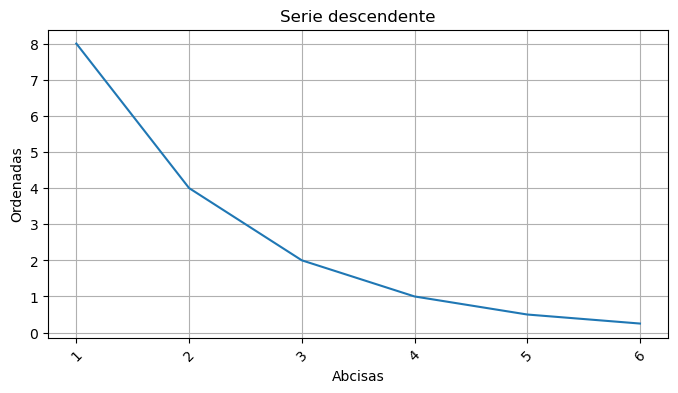

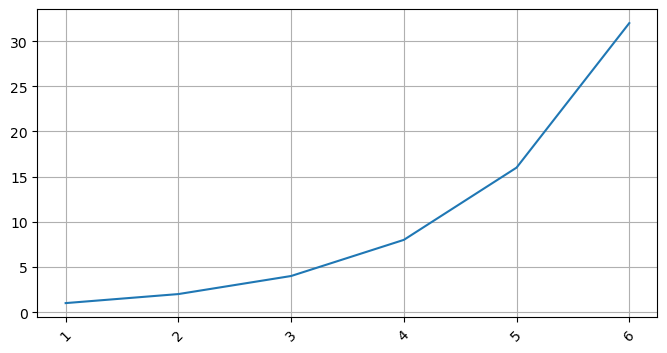

In [31]:
# Pruebas de funcionamiento:

representar_xxx_yyy(
    [(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)],
    ["Serie descendente", "Ordenadas", "Abcisas"]
    )

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [32]:
# Esta celda debe ser completada por el estudiante
def repr_movies_years(data, year1, year2):
    """
    Crea una gráfica de línea que muestra la cantidad de películas
    por año dentro de un rango específico.

    Parameters
    ----------
    data : dict
        Diccionario que contiene la cantidad de películas por año, donde:
        - key : int
            Año.
        - value :int
            Número de películas lanzadas en ese año.
    year1 : int
        Año inicial del rango para filtrar los datos de la gráfica.
    year2 : int
        Año final del rango para filtrar los datos de la gráfica.

    Returns
    -------
    None
        La función no devuelve ningún valor.
        Genera y muestra una gráfica de línea
        con el número de películas por año en el rango especificado.
    """

    plt.figure(figsize=(8, 4))
    plt.title("Number of movies in our database")
    plt.ylabel("num. movies in a year")
    plt.xlabel("years")
    new_dict = years_num_movies(data, year1, year2)
    num_movies_sorted = [
        (key, num_movies[key]) for key in sorted(new_dict.keys())
        ]
    x_values = [x[0] for x in num_movies_sorted]
    y_values = [y[1] for y in num_movies_sorted]
    plt.plot(x_values, y_values)
    plt.xticks(range(min(x_values), max(x_values) + 1, 1))
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

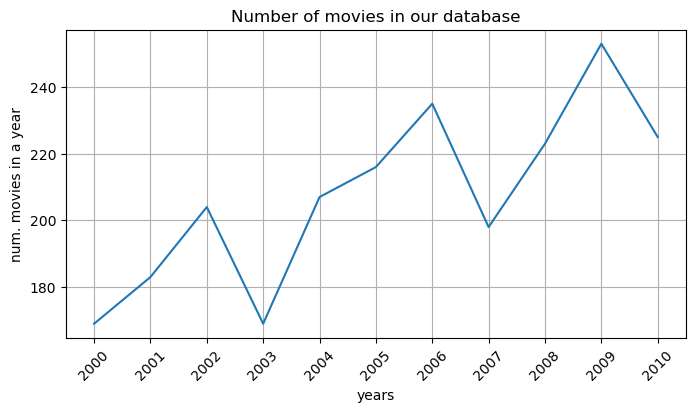

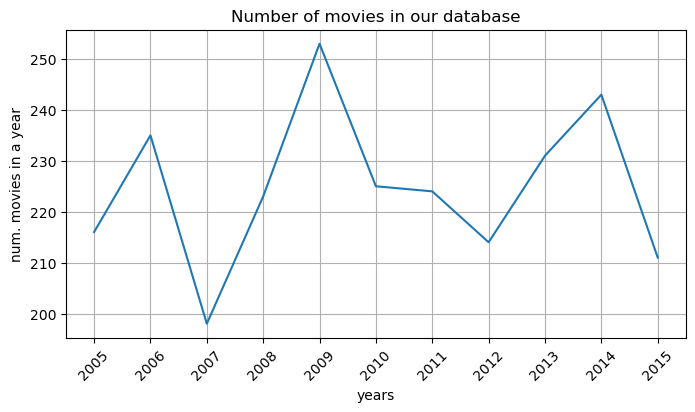

In [33]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

<font color="darkblue">
<h4> Resumen del apartado C.1. </h4>

En este apartado se realizaron las siguientes acciones:
<ol>
<li> Se desarrolló una función representar_xxx_yyy que genera gráficos básicos para representar visualmente las métricas de dadas. </li>
<li> Se implementó una función repr_movies_years que genera una gráfica visual de las métricas de las películas, como el número de películas realizadas por año. </li>

</ol>
</font>

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [34]:
# Esta celda debe ser completada por el estudiante

# variable que guarda todos los urls en una lista
urls = [url[7] for url in main_dict_data.values()]
# variable que contiene un string formateado
first_url_movie = f"{urls[0]} ({urls[0]})"
# variable que guarda los 11 primeros valores
first_ten_urls = urls[0:10]

In [35]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/ (http://www.imdb.com/title/tt0499549/)

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


<font color="darkblue">
<h4> Resumen del apartado D.1. </h4>

En este apartado se realizaron las siguientes acciones:
<ol>
<li> Se contabilizan el total de URLs en los datos y se almacenan en una variable. 
<li> Se almacena en una variable un string formateado del primer URL. </li> 
<li> Se almacenan los 10 primeros URLs en una lista. </li>
</ol>
</font>

In [36]:
# Una forma de evitar el error "Requests 403 forbidden"
# # al hacer web scraping en las siguientes celdas:
HEADERS = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0)"
        "Gecko/20100101 Firefox/98.0"
                   ),
    "Accept": (
        "text/html,application/xhtml+xml,application/xml;q=0.9,"
        "image/avif,image/webp,*/*;q=0.8"
    ),
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate",
    "Connection": "keep-alive",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "Cache-Control": "max-age=0",
    }

<font color="darkblue">
<h5> Observación: </h5>

Dado que HEADER es dada y no ha sido creada por mí la he dejado ubicada aquí. 
<br>
Sin embargo, al estar en mayúsculas debería ser considerada una constante global y debería estar ubicada al inicio del Notebook.

</font>

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [37]:
# Esta celda debe ser completada por el estudiante
def soup_movie(url):
    """
    Obtiene y analiza el contenido HTML de una página web utilizando
    BeautifulSoup.

    Parameters
    ----------
    url : str
        URL de la página web que se desea analizar.

    Returns
    -------
    BeautifulSoup : object
        Un objeto BeautifulSoup que representa el documento HTML analizado.
    """

    requests.packages.urllib3.disable_warnings()
    html = requests.get(
        url.split(" ")[0],
        headers=HEADERS,
        verify=False).text
    return BeautifulSoup(html, "lxml")

In [38]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ..."
      "... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta charset="utf-8"/><meta content="width=device-width" name="viewport"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1731614286789);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and pr

<font color="darkblue">
<h4> Resumen del apartado D.2. </h4>

En este apartado se realizaron las siguientes acciones:

<ol> 
<li>Se implementó una función que utiliza HEADERS para realizar el web scraping del HTML de una película. La función se encarga de hacer una solicitud HTTP al sitio web que contiene los datos de la película, utilizando los encabezados HEADERS necesarios para simular una solicitud legítima de un navegador y evitar bloqueos o restricciones.</li> 
<li>La función extrae los datos relevantes de la página web, como el título, año de estreno, género, presupuesto, entre otros, según las necesidades del análisis.</li> 
<li> Se aseguró que la función fuera eficiente y que la información extraída fuera precisa, permitiendo la integración de estos datos en el conjunto general para análisis posteriores.</li> 
<li> Se almaceno el HTML obtenido en la variable soup. </li>
<li> Para comprobar su funcionalidad de imprieron los 1000 primeros elementos y los últimos 1000 de soup. </li>
</ol>
</font>

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [39]:
# Esta celda debe ser completada por el estudiante

# Imprime el título del HTML
print(soup.find("title"))
print()
# Imprime la descrición del meta
print(soup.find("meta", {"name": "description"})["content"])
print()
# Crea una lista con todos los actores principales
# extraídos del title-cast-item_actor
print(
    [
        actor.find("a", {"data-testid": "title-cast-item__actor"})
        .text.strip()
        for actor in soup.find_all("div", {"data-testid": "title-cast-item"})
       ])
print()
print(soup.find
      ("li", {"data-testid": "title-boxoffice-budget"})
      .find(
          'span', class_='ipc-metadata-list-item__list-content-item'
          ).text)

<title>Avatar (2009) - IMDb</title>

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy']

$237,000,000 (estimated)


<font color="darkblue">
<h4> Resumen del apartado D.3. </h4>

En este apartado se realizaron las siguientes acciones:

<ol> 
<li> Se utilizó web scraping para extraer piezas específicas de información de las URLs de IMDb, usando herramientas como BeautifulSoup para analizar la estructura HTML de las páginas de las películas. </li>
<li> Se navegó a través de las páginas de IMDb asociadas con cada película para extraer la información relevante como el título, el director, o incluso el presupuesto o el reparto, dependiendo de los campos disponibles en cada página. </li>
</ol>
</font>

### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [40]:
# Esta celda debe ser completada por el estudiante
def gather_actors(text, url_list):
    """
    Extrae los nombres de actores principales de una lista de URLs
    y los guarda en un archivo de texto.

    Parameters
    ----------
    text : str
        Nombre del archivo de texto donde se guardarán los nombres
        de los actores.
    url_list : list of str
        Lista de URLs de las páginas web de las que se extraerán los
        nombres de actores.

    Returns
    -------
    None
        La función no devuelve ningún valor. Escribe los nombres de los
        actores en el archivo de texto especificado.
    """

    with open(text, 'w') as f:
        for url in url_list:
            for actor in [
                actor.find("a", {"data-testid": "title-cast-item__actor"})
                .text.strip()
                for actor in soup_movie(url).find_all(
                     "div", {"data-testid": "title-cast-item"}
                     )
                     ]:
                f.write(f"{actor}\n")

In [41]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

! type actors_3_first_movies.txt

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Johnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan Skarsgård
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot Keaney
Daniel Craig
Christoph Waltz
Léa Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


<font color="darkblue">
<h4> Resumen del apartado D.4. </h4>

En este apartado se realizaron las siguientes acciones:

<ol> 
<li> Se implementó una función que extrae todos los actores de cada película en el conjunto de datos. 
Esta función recorre las películas y recolecta los nombres de los actores asociados, permitiendo un acceso fácil y organizado a esta información. </li> 
<li> Se verificó el correcto funcionamiento de la función mediante la creación de un archivo de salida que guarda, de manera organizada, los nombres de todos los actores involucrados. Este archivo asegura que los datos sean accesibles para su análisis posterior.</li>
</ol>
</font>

In [42]:
# La siguente llamada llevaría un tiempo realmente largo:

# import time # para cronometrar esta función, que tarda mucho

# reloj_inicio = time.time()
# gather_actors("actors_all_movies.txt", urls)
# reloj_fin = time.time()

# print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [43]:
# Esta celda debe ser completada por el estudiante
def load_dataframe(raw_data):
    """
    Carga los datos en bruto de una lista y los convierte en un DataFrame de Pandas.

    Parameters
    ----------
    raw_data : list
        Lista que contiene los datos en bruto, donde la primera fila es el encabezado
        y las filas siguientes contienen los datos de las películas.

    Returns
    -------
    pandas.DataFrame
        Un DataFrame de Pandas que contiene los datos cargados, con las columnas
        definidas por la primera fila y las filas restantes correspondientes a los
        datos de la tabla. Los valores vacíos se reemplazan por NaN y los valores
        numéricos son convertidos a tipo flotante.
    """

    df = pd.DataFrame(
        raw_data[1:],
        columns=raw_data[0]
        ).replace(r"^\s*$", np.nan, regex=True)

    for column in df.columns:
        try:
            df[column] = pd.to_numeric(df[column], downcast="float")
        except ValueError:
            continue
    return df

In [44]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84.0
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000.0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16.0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660.0


<font color="darkblue">
<h4> Resumen del apartado E.1. </h4>

En este apartado se realizaron las siguientes acciones:

<ol> 
    <li> Se emplea la función pd.DataFrame() de pandas para convertir los datos en bruto (proporcionados como una lista) en un DataFrame. </li>
    <li> El archivo de datos es primero cargado en una lista, donde la primera fila se usa como encabezado para las columnas, y el resto de las filas se convierten en los registros.</li>
    <li> La función también se asegura de que los valores vacíos se sustituyan por NaN y convierte los valores numéricos a tipo flotante cuando es posible. </li>
    <li> Aunque los datos ya habian sido previamente organizados utilizando otra técnica, esto muestra la potencia que tiene Pandas par transformar un conjunto de datos no estructurado en una forma organizada.</li>
    <li> Se crea una variable tabla_completa que almacena el dataframe retornado por load_dataframe. </li>
</ol>
</font>

### E.2. Tabla de los campos principales

A partir de la tabla anterior, construimos otra con sólo algumos de los campos:

In [45]:
# Esta celda debe ser completada por el estudiante
def fields_selected_dataframe(table):
    """
    Crea una copia del DataFrame y selecciona un subconjunto
    específico de columnas.

    Parameters
    ----------
    table : pandas.DataFrame
        DataFrame que contiene información sobre películas, con
        varias columnas.

    Returns
    -------
    pandas.DataFrame
        Un nuevo DataFrame que contiene únicamente las siguientes columnas:
        - "movie_title" : Título de la película
        - "color" : Color de la película
        - "director_name" : Nombre del director
        - "language" : Idioma de la película
        - "country" : País de origen de la película
        - "actor_1_name" : Nombre del primer actor
        - "movie_imdb_link" : Enlace a la película en IMDb
    """

    return table.copy()[
        [
            "movie_title", "color", "director_name", "language", "country",
            "actor_1_name", "movie_imdb_link"
            ]
        ]

In [46]:

# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


<font color="darkblue">
<h4> Resumen del apartado E.2. </h4>

En este apartado se realizaron las siguientes acciones:

<ol> 
    <li> Se crea una copia del dataframe con solo las columnas de intéres. </li>
</ol>
</font>

### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [47]:
# Esta celda debe ser completada por el estudiante
print(tabla_breve.columns)

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')


<font color="darkblue">
<h4> Resumen del apartado E.3. </h4>

En este apartado se realizaron las siguientes acciones:

<ol> 
    <li> Se imprimió correctamente las columnas de la tabla breve. </li>
    <li> Se obtuvo una lista clara y el tipo de data </li>
</ol>
</font>

### E.4. Campos missing

Algunos campos muestran un valor `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [48]:
# Esta celda debe ser completada por el estudiante
tabla_breve.loc[:, :] = tabla_breve.fillna("Desc").replace("NaN", "Desc")

In [49]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


<font color="darkblue">
<h4> Resumen del apartado E.4. </h4>

En este apartado se realizaron las siguientes acciones:

<ol> 
    <li> Se sustituyó NaN por Desc </li>
</ol>
</font>

### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [50]:
# Esta celda debe ser completada por el estudiante
def titulos_de_director_df(table, director):
    """
    Filtra el DataFrame para obtener los títulos de las películas dirigidas por un director específico.

    Parameters
    ----------
    table : pandas.DataFrame
        DataFrame que contiene información sobre películas, incluyendo una columna "director_name".

    director : str
        Nombre del director cuyas películas se desean filtrar.

    Returns
    -------
    pandas.DataFrame
        Un DataFrame que contiene los títulos de las películas dirigidas por el director especificado,
        con una columna "movie_title".
    """

    return table.loc[table["director_name"] == director, ["movie_title"]]

In [51]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [52]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [53]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies_df(table):
    """
    Obtiene el director con el segundo mayor número de películas del
    DataFrame proporcionado.

    Parameters
    ----------
    table : pandas.DataFrame
        Un DataFrame de pandas que contiene datos de películas, con una
        columna 'director_name' que lista los nombres de los directores
        para cada película.

    Returns
    -------
    list
        Una lista que contiene el nombre del director con el segundo mayor
        número de películas.
    int
        El número de películas dirigidas por el director con el
        segundo mayor conteo.
    """

    director_movies = table["director_name"].value_counts().nlargest(2)
    max_director_movies = director_movies.index[1]
    max_amount_movies = director_movies.iloc[1]
    return [max_director_movies], max_amount_movies

In [54]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

<font color="darkblue">
<h4> Resumen del apartado E.5. </h4>

En este apartado se realizaron las siguientes acciones:

<ol>
    <li>Se desarrolló una función que filtra el DataFrame para devolver los títulos de las películas dirigidas por un director especificado, junto con el número de fila correspondiente de cada película en el DataFrame.</li>
    <li>Se creó una lista llamada list_tits, que almacena los valores de la variable tabla_tits, conteniendo los títulos de las películas obtenidos a partir de la filtración anterior.</li> <li>Se identificó al director con más películas en el conjunto de datos y se determinó la cantidad de estas películas.</li> 
</ol>
</font>


# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

<font color="darkblue">
Para solucionar este apartado se encesita adaptar la ruta del archivo "algunos_campos.txt".
Se puede hacer de dos formas:
<br>
<ol>
<li> Copiando y pegando el archivo en el mismo lugar que language_budget_countries.py y el notebook </li>
<li> Copiando esta ruta ./data_in/algunos_campos.txt como muestra el comentario abajo </li> 
</ol>
Para solucionar este apartado se utilizo la primera opción, y la segunda se dejo comentada.
</font>

In [55]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

#! python language_budget_countries.py -q ./data_in/algunos_campos.txt

"Aboriginal"	[["Australia","UK"],86000000]
"Arabic"	[["United Arab Emirates","Turkey","Egypt","France"],11225000]
"Aramaic"	[["USA"],30000000]
"Bosnian"	[["USA"],13000000]
"Cantonese"	[["China","Hong Kong"],154500000]
"Chinese"	[["China"],12000000]
"Czech"	[["Czech Republic"],84450000]
"Danish"	[["Denmark"],50100000]
"Dari"	[["USA","Afghanistan"],20046000]
"Dutch"	[["Netherlands"],32150000]
"Dzongkha"	[["Australia"],1800000]
"English"	[["South Africa","India","Georgia","France","New Zealand","Iran","China","Switzerland","Ireland","Brazil","Thailand","Germany","Peru","UK","Russia","Hungary","Italy","Greece","Bahamas","USA","Philippines","Japan","Chile","Poland","Hong Kong","Panama","West Germany","Romania","Mexico","Belgium","Libya","Norway","Denmark","Bulgaria","Nigeria","Australia","Kyrgyzstan","Official site","Iceland","New Line","South Korea","Spain","Czech Republic","Canada","Aruba","Netherlands"],142054875246]
"Filipino"	[["USA"],80000000]
"French"	[["UK","France","Canada","Finlan

In [56]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [57]:
def print_file(filename):
    """
    Lee y muestra el contenido de un archivo línea por línea en la consola.

    Parameters
    ----------
    filename : str
        El nombre del archivo que se desea leer.

    Returns
    -------
    None
        La función no retorna ningún valor. Imprime el contenido del archivo
        línea por línea en la consola.
    """

    with open(filename, "r") as f:
        for line in f:
            print(line, end="")


print_file("language_budget_countries.py")

from mrjob.job import MRJob

class MRLanguagesBudgetCountries(MRJob):
    def mapper(self, _, line):
        fields = line.split('|')
        if len(fields) < 5:
            return
        language = fields[2]
        country = fields[3]
        try:
            budget = int(fields[4])
        except ValueError:
            return
        if (language == "-1" or language == "") or (country == "-1" or country == "") or budget == -1:
            return
        yield language, (country, budget)


    def reducer(self, language, country_budget_pairs):
        country_set = set()
        total_budget = 0
        for country, budget in country_budget_pairs:
            country_set.add(country)
            total_budget += budget
        country_list = list(country_set)
        yield language, [country_list, total_budget]


if __name__ == '__main__':
    MRLanguagesBudgetCountries.run()


<font color="darkblue">
<h4> Resumen del apartado F </h4>

En este apartado se realizaron las siguientes acciones:

<ol>
    <li> Se creo un programa llamando language_budget_countries.py.</li>
    <li>El objetivo principal del programa es calcular el presupuesto total asociado con cada idioma, agrupado por países. </li>
    <li> El programa se explicará en los siguientes puntos para facilitar su comprensión:</li>
        <ul>
            <li> Se importa MRJOB de la biblioteca mrjob.job 
            <li> Se creó una clase llamada MRLanguagesBudgetCountries que recibe como parametros MRJOB y contiene dos funciones mapper y reducer. </li>
            <li> Mapper es una función que recibe una línea de datos. Se encarga de dividir en campos utilizando el delimitador "|" . 
                <br>
                Se hacen controles para confirmar que los campos de intéres contienen datos válidos. Si los valores son válidos, mapper emite una clave language y un valor que es una tupla compuesta por country y budget.
            </li>
            <li> Reducer es una función que toma la clave y los valores asociados que provienen de mapper.
                <br>
                Agrupa los países en conjunto country_set y suma los presupuestos. Dado que en los conjuntos no pueden haber duplicados, no se hace una verificación. 
                <br>
                Esto permite calcular el total de presupuesto para cada idioma, agrupado opr paises.
            </li>
        </ul>
    </li>
    <li> El programa realiza un mapeo y reducción de los datos, de manera que al final del proceso obtenemos el presupuesto total asociado con cada idioma y los países correspondientes. </li>
<ol>
</font>


# Parte G. Un apartado libre [0.5 puntos]

<br>

<font color="darkblue">
<h2> Análisis de la Relación entre Duración, Presupuesto y Puntuación de IMDb de las Películas por País y Año</h2>

En este análisis, se busca explorar la relación entre la duración de las películas, su presupuesto y su puntuación en IMDb. Utilizando un enfoque de análisis de datos con Pandas, el proceso se divide en varias etapas:
<ol>
    <li> Filtrado y limpieza de datos: Primero se seleccionarán las columnas relevantes y se eliminarán los valores nulos. Esto asegura que solo se utilicen datos completos y útiles.</li>
    <li> Cálculo de promedios: Luego, se calcularán los promedios de duración y presupuesto de las películas, agrupados por país, año y puntuación de IMDb. Este paso proporciona una visión general de cómo estos dos factores se distribuyen a través de diferentes categorías. </li>
    <li> Visualización de los resultados: Para interpretar los resultados se crearn dos gráficas. La primera mostrara</li>
</ol>
Para facilitar la comprensión de este apartado, cada función utilizada en el análisis se presenta en bloques separados con sus respectivas descripciones. Estas funciones proporcionan las herramientas necesarias para examinar cómo varían las características de las películas en diferentes países, períodos y niveles de popularidad, lo que ofrece un contexto valioso para estudios sobre la industria cinematográfica.
</font>

In [58]:
# Este apartado debe ser completado por el estudiante
def select_movie_data(table):
    """
    Filtra las columnas relevantes del DataFrame de películas y
    elimina los valores nulos.

    Parameters
    ----------
    table : pd.DataFrame
        DataFrame de entrada que contiene los datos de las películas.

    Returns
    -------
    pd.DataFrame
        DataFrame filtrado que incluye las columnas 'country', 'title_year',
        'imdb_score', 'duration' y 'budget', y sin valores nulos.
    """

    df = table.copy()[
        ["country", "title_year", "imdb_score", "duration", "budget"]
        ].dropna()
    return df

<font color="darkblue">

En este apartado se realizaro la siguiente acción:
<ul>
    <li> Está función se encarga de preparar, seleccionar y limpiar los datos para el análisis.</li>
</ul>
</font>

In [59]:
def average_duration_budget(df, min_duration=0, min_budget=0):
    """
    Agrupa los datos por país, año y puntaje de IMDb, calculando los promedios
    de duración y presupuesto, con filtros opcionales.

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame con las columnas 'country', 'title_year', 'imdb_score',
        'duration', 'budget'.
    min_duration : int, opcional
        Duración mínima para filtrar las películas. El valor por defecto es 0.
    min_budget : int, opcional
        Presupuesto mínimo para filtrar las películas.
        El valor por defecto es 0.

    Returns
    -------
    pd.DataFrame
        DataFrame con los promedios de duración y presupuesto por país, año
        y puntaje de IMDb.
    """
    
    df = df[(df['duration'] >= min_duration) & (df['budget'] >= min_budget)]
    grouped = df.groupby(["country", "title_year", "imdb_score"])
    return grouped[["duration", "budget"]].mean().round(0)


<font color="darkblue">

En este apartado se realizaro la siguiente acción:
<ul>
    <li> La función calcula los promedios de duración y presupuesto por país, año y puntuacion de IMDb.</li>
</ul>
</font>

In [60]:
def plot_country_avg_budget(averages, top_n=10):
    """
    Grafica la duración promedio de las películas por país.

    Parameters
    ----------
    averages : pd.DataFrame
        DataFrame que contiene los promedios de duración y presupuesto,
        con una columna 'country' que representa los países y una columna
        'budget' que contiene los valores del presupuesto.
    top_n : int, opcional
        Número de países a mostrar en el gráfico. El valor por defecto es 10.

    Returns
    -------
    None
        La función no retorna nada. Muestra una gráfica de barras con los
        presupuestos promedio por país.
    """
    
    avg_budget = averages.groupby('country')['budget']\
        .mean().sort_values(ascending=False).head(top_n)

    plt.figure(figsize=(12, 6))
    (avg_budget / 1e9).plot(kind='bar', color='skyblue')  # Convertimos a miles de millones de dólares
    plt.title(f'Top {top_n} Countries by Average Budget')
    plt.xlabel('Country')
    plt.ylabel('Budget (Billion in $)')
    plt.xticks(rotation=90)
    plt.show()


<font color="darkblue">

En este apartado se realizaro la siguiente acción:
<ul>
    <li> Se desarrollo una función que permite visualizar el presupuesto promedio por país.</li>
</ul>
</font>

In [61]:
def plot_movie_duration_by_country_and_year(
        averages, country, start_year=2000, end_year=None,
        min_imdb_score=None, max_imdb_score=5.0
        ):
    """
    Grafica la duración promedio de las películas por país, año y puntaje
    de IMDb.

    Parameters
    ----------
    averages : pd.DataFrame
        DataFrame que contiene los promedios de duración, presupuesto,
        puntaje de IMDb y año para las películas, con columnas 'title_year',
        'imdb_score', y 'duration'.
    country : str
        País para filtrar los datos.
    start_year : int, opcional
        Año inicial para el filtro. El valor por defecto es 2000.
    end_year : int, opcional
        Año final para el filtro. El valor por defecto es None (sin filtro).
    min_imdb_score : float, opcional
        Puntaje mínimo de IMDb para filtrar. El valor por defecto es None.
    max_imdb_score : float, opcional
        Puntaje máximo de IMDb para filtrar. El valor por defecto es 5.0.

    Returns
    -------
    None
        La función no retorna ningún valor. Muestra una gráfica de calor
        (heatmap) que representa la duración promedio de las películas por
        año y puntaje de IMDb para el país seleccionado.
    """

    country_data = averages.loc[country]
    country_data = country_data.reset_index()

    if start_year is not None:
        country_data = country_data[country_data['title_year'] >= start_year]

    if end_year is not None:
        country_data = country_data[country_data['title_year'] <= end_year]

    if min_imdb_score is not None:
        country_data = country_data[country_data['imdb_score'] >= min_imdb_score]

    if max_imdb_score is not None:
        country_data = country_data[country_data['imdb_score'] <= max_imdb_score]

    pivot_duration = country_data.pivot_table(
        index='imdb_score', columns='title_year',
        values='duration', aggfunc='mean'
    )

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_duration, cmap="YlGnBu", annot=True, fmt=".1f",
        linewidths=.5, cbar_kws={'label': 'Average Duration (minutes)'}
    )
    plt.title(f"Average Movie Duration by Year for {country}")
    plt.xlabel("Year")
    plt.ylabel("IMDb Score")
    plt.xticks(rotation=45)
    plt.show()

<font color="darkblue">

En este apartado se realizaro la siguiente acción:
<ul>
    <li> Se implementó una función para visualizar la duración promedio de las películas por país, año y puntuación de IMDb.</li>
</ul>
</font>

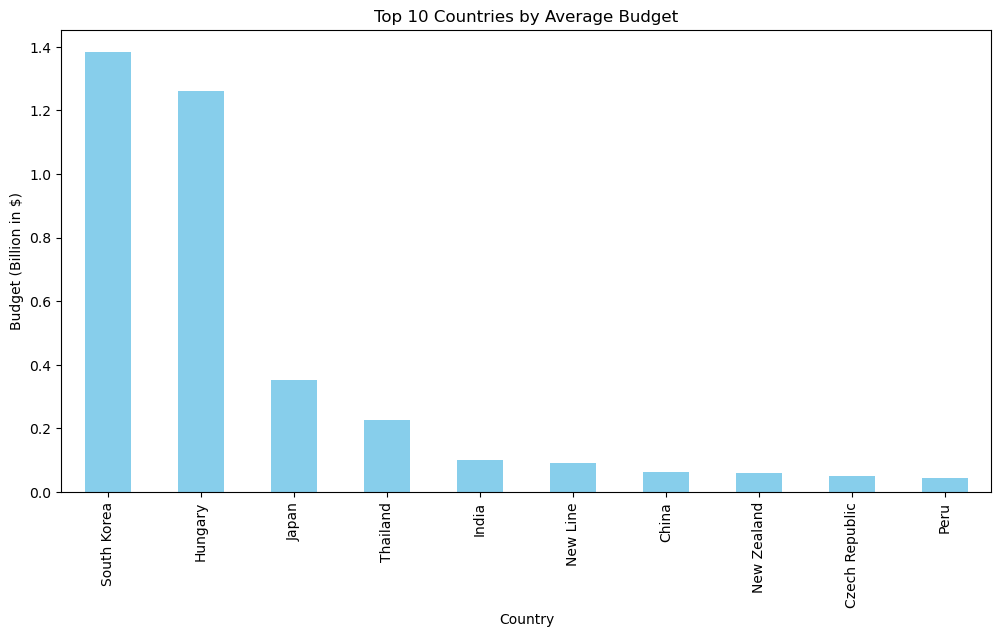

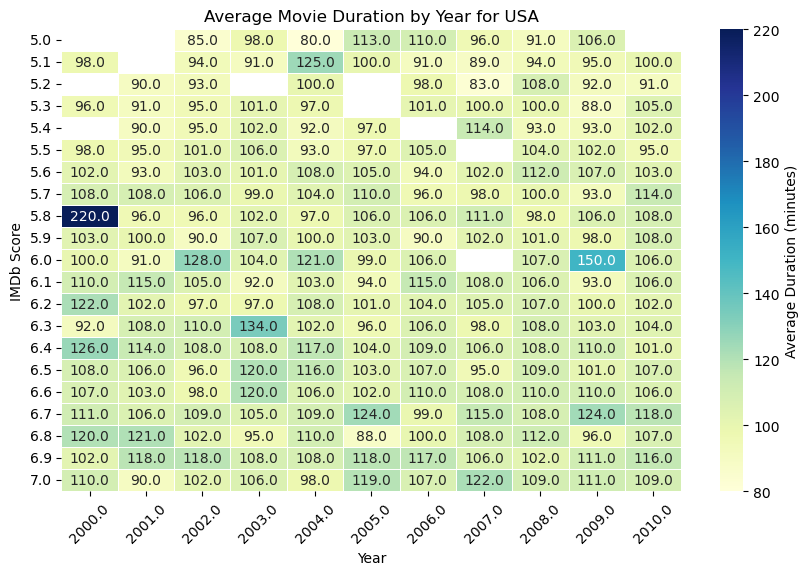

In [62]:
# Pruebas de funcionamiento, también tarea del estudiante:

df_clean = select_movie_data(tabla_completa)
averages = average_duration_budget(df_clean)
plot_country_avg_budget(averages)
plot_movie_duration_by_country_and_year(
    averages, country="USA", start_year=2000, end_year=2010,
    min_imdb_score=5, max_imdb_score=7.0
    )

# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** D'Orazio De Abreu
-   **Nombre:** José Antonio
-   **Email:** josedorazio@gmail.com
-   **Fecha:** 14.11.2024

<br>
</font>
<font color="black">
    
### Ficha de autoevaluación
<br>

<font color="darkblue">
He logrado hacer todos los apartados del A al G. 

</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.5  / 2.5  |Completamente resuelto |
|b)  |2.0  / 2.0  |Completamente resuelto |
|c)  |1.5  / 1.5  |Completamente resuelto |
|d)  |1.0 / 1.0  |Completamente resuelto |
|e)  |2.0  / 2.0  |Completamente resuelto |
|f)  |0.5  / 0.5  |Completamente resuelto |
|g)  |0.3 / 0.5  |Completamente resuelto |
|**Total** |**9.8** / 10.0|**Sobresaliente**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
</font>
<font color="darkblue">
Estás fueron las fuentes utilizadas:
<ul>
    <li> https://www.geeksforgeeks.org/python-programming-language-tutorial/ </li>
    <li> https://www.geeksforgeeks.org/map-reduce-and-filter-operations-in-python/ </li>
    <li> https://stackoverflow.com/ </li>
    <li> https://www.datacamp.com/es/tutorial/pep8-tutorial-python-code </li>
    <li> https://peps.python.org/pep-0008/ </li>
    <li> https://chatgpt.com/?model=auto </li>
    <li> https://campus2024-2025.ucmmaster.com/mod/folder/view.php?id=274 </li>
</ul>
</font>
    

</font>

<br>

<font color="green">
</font>

<br>

<font color="black">
    
### Comentario adicional

</font>

<br>

<font color="darkblue">

Para comprobar si el Notebook estaba cumplimiento con la normativa PEP-8 se realizaron los siguientes pasos:

1. Se instalaron los paquetes: pep8, flake8 y pycodestyle_magic
   
2. Luego antes de la primera linea de código, copiar el siguiente comando
   1. %load_ext pycodestyle_magic
   2. %pycodestyle_on

Al ejecutarlo, cada vez que una línea de código no cumpla con el formato establecido, se nos informará de ello.
</font>
<br>